start
2020/04/27 13:31:42


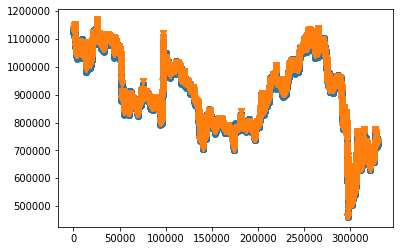

end
2020/04/27 13:31:47


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin

def plot(b):
    x = b.data_test
    y = b.model.predict(x)
    y_pred = b.label_test

    plt.plot(list(range(len(x))), y, marker="o")
    plt.plot(list(range(len(x))), y_pred, marker="v")
    plt.show()

def main():
    print('start')
    print(dt.now().strftime("%Y/%m/%d %H:%M:%S"))


    csv = pd.read_csv("train2.csv")
    b = bitcoin.BitcoinRegression(csv)
    b.set_train_test_dataset(0.8, 0.2)
    b.load_model('model.pickle')
    plot(b)

    
    print('end')
    print(dt.now().strftime("%Y/%m/%d %H:%M:%S"))

if __name__ == "__main__":
    main()